## Data Exploration and Understanding correlations
This script primarily explores RECS data to understand
1. distinction in data features (categorical, numerical, possible predictors and outputs)
2. Understand correlation between features
3. Any missing / duplicate values
4. Data requiring one-hot encoding


In [1]:
# IMport dependencies
import pandas as pd
from pandas import set_option
import numpy
import os
import csv

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# set global variables
dataFilePath = "dataforfinalproject"
filename = "RECS_COMBINED_DATA.csv"
cols_file = "Final_Columns_withCat.csv"

In [3]:
# read dataset and cols into DF
df_recs = pd.read_csv(os.path.join(dataFilePath, filename), low_memory= False)
df_cols = pd.read_csv(os.path.join(dataFilePath, cols_file))

In [4]:
# Read the catgory columns into a dict
df_cols.columns
# get abbr of categories
categories = df_cols.COLUMN_CAT_ABBR.unique()

print(f" Categories data is divided into are : {categories}")

# store each col set per category inta dict

cols_by_cat = {}
for c in categories:
    cols_by_cat[c] = df_cols[df_cols.COLUMN_CAT_ABBR == c].COLUMN_NAME.tolist()

print("\n Columns for a sample category (HUC)")
print(cols_by_cat['HUC'])

 Categories data is divided into are : ['COMMON' 'HUC' 'WTH' 'APL_OTH' 'APL_KIT' 'SPH' 'FUP' 'HMC' 'E_CONS'
 'E_EXP' 'E_SUP']

 Columns for a sample category (HUC)
['CELLAR', 'STORIES', 'PRKGPLC1', 'YEARMADE', 'OCCUPYY', 'BEDROOMS', 'NCOMBATH', 'NHAFBATH', 'OTHROOMS', 'TOTROOMS', 'UGASHERE', 'ATTCHEAT', 'GARGHEAT', 'TOTCSQFT', 'TOTHSQFT', 'TOTUSQFT', 'KOWNRENT']


In [30]:
# Start Data Exploration
print(f"shape of the dataset df_recs is {df_recs.shape}")

# print the dtypes
set_option("precision", 1)
df_recs.head()

shape of the dataset df_recs is (26973, 199)


,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
0,2001,1001,1,1,2,1,31,1,9,9,...,9,0,0,0,0,0,0,8,2,3
1,2001,1002,3,7,2,0,10,1,7,9,...,9,0,0,0,0,0,0,7,2,3
2,2001,1003,4,9,2,0,20,1,4,1,...,9,0,0,0,0,0,0,9,0,3
3,2001,1004,1,1,2,1,31,1,1,2,...,0,0,1,0,0,0,0,12,6,3
4,2001,1005,4,9,2,0,10,1,3,9,...,9,0,0,0,0,0,0,6,2,3


In [31]:
set_option("precision",1)
df_recs.describe()

,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
count,26973.0,26973.0,26973.0,26973.0,26973.0,26973.0,26973.0,26973.0,26973.0,26973.0,...,26973.0,26973.0,26973.0,2.7e+04,2.7e+04,2.7e+04,2.7e+04,26973.0,26973.0,26973.0
mean,2008.2,6382.2,2.6,5.3,2.6,1.1,19.1,0.8,4.2,6.8,...,1.5,-1.1,0.1,1.2e-03,9.3e-03,2.4e-03,5.9e-03,6.9,2.9,1.6
std,4.6,4460.8,1.1,2.8,1.2,3.4,25.5,2.6,2.4,2.2,...,4.9,1.0,0.3,3.4e-02,9.6e-02,4.9e-02,7.6e-02,3.9,2.5,1.1
min,2001.0,1.0,1.0,1.0,1.0,-2.0,-2.0,-2.0,1.0,1.0,...,-2.0,-2.0,0.0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0,0.0,0.0
25%,2005.0,2585.0,2.0,3.0,2.0,0.0,10.0,0.0,2.0,6.0,...,-2.0,-2.0,0.0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,4.0,0.0,1.0
50%,2009.0,5064.0,3.0,5.0,2.0,0.0,10.0,0.0,4.0,8.0,...,-2.0,-2.0,0.0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,6.0,3.0,2.0
75%,2009.0,10513.0,3.0,7.0,3.0,1.0,20.0,1.0,6.0,8.0,...,9.0,0.0,0.0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,9.0,4.0,2.0
max,2015.0,15686.0,4.0,10.0,5.0,9.0,99.0,9.0,13.0,9.0,...,9.0,1.0,1.0,1.0e+00,1.0e+00,1.0e+00,1.0e+00,43.0,23.0,10.0


### now we will analyse each group of data based on category the column belongs.
The analysis will be check 
a. correlation between various categories vs TOTAL BTU and derive a r2 
b. 

In [59]:
print(f" Categories data is divided into are : {categories}")

 Categories data is divided into are : ['COMMON' 'HUC' 'WTH' 'APL_OTH' 'APL_KIT' 'SPH' 'FUP' 'HMC' 'E_CONS'
 'E_EXP' 'E_SUP']


In [105]:
# Draw correlation between TOTAL BTU, TOTALDOLLAR and COMMON Variables
df_corr = df_recs[['TOTALBTU',"TOTALBTUSPH", "TOTALBTUWTH", "TOTALBTUOTH", "BTUEL","BTULP", "BTUNG", "BTUFO"]]
#df_corr = df_recs[['TOTALDOLLAR',"TOTALDOLSPH", "TOTALDOLWTH", "TOTALDOLOTH", "DOLLAREL","DOLLARLP", "DOLLARNG", "DOLLARFO"]]
df_corr[cols_by_cat['COMMON']] = df_recs[cols_by_cat['COMMON']]


# drop recsyear and DOEID from df_corr as they are identifier rather than predictors
df_corr.drop(['RECSYEAR','DOEID'], axis = 1, inplace = True)
df_corr.head()

corr_matrix = df_corr.corr(method = "spearman")

print("CORRELATION OF CONSUMPTION  TO REGION, DIVISION, TYPE OF HOUSE")
corr_matrix.iloc[:8,8:].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm_r'), axis=1)

CORRELATION OF CONSUMPTION  TO REGION, DIVISION, TYPE OF HOUSE


,REGIONC,DIVISION,TYPEHUQ,NWEIGHT,CDD65,HDD65
TOTALBTU,-0.23,-0.25,-0.29,0.21,-0.14,0.3
TOTALBTUSPH,-0.33,-0.35,-0.17,0.24,-0.31,0.46
TOTALBTUWTH,-0.074,-0.081,-0.18,0.21,-0.088,0.16
TOTALBTUOTH,0.01,-0.0009,-0.33,0.2,0.2,-0.065
BTUEL,0.074,0.074,-0.39,-0.0076,0.28,-0.15
BTULP,-0.045,-0.066,-0.096,0.31,0.012,0.081
BTUNG,-0.14,-0.14,-0.086,0.14,-0.18,0.26
BTUFO,-0.17,-0.19,-0.019,0.3,-0.048,0.14


In [106]:
# Draw correlation between TOTAL BTU, TOTALDOLLAR and COMMON Variables
#df_corr = df_recs[['TOTALBTU',"TOTALBTUSPH", "TOTALBTUWTH", "TOTALBTUOTH", "BTUEL","BTULP", "BTUNG", "BTUFO"]]
df_corr = df_recs[['TOTALDOLLAR',"TOTALDOLSPH", "TOTALDOLWTH", "TOTALDOLOTH", "DOLLAREL","DOLLARLP", "DOLLARNG", "DOLLARFO"]]
df_corr[cols_by_cat['COMMON']] = df_recs[cols_by_cat['COMMON']]

# drop recsyear and DOEID from df_corr as they are identifier rather than predictors
df_corr.drop(['RECSYEAR','DOEID'], axis = 1, inplace = True)
df_corr.head()

corr_matrix = df_corr.corr(method = "spearman")

print("CORRELATION OF CONSUMPTION  TO REGION, DIVISION, TYPE OF HOUSE")
corr_matrix.iloc[:8,8:].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm_r'), axis=1)

CORRELATION OF CONSUMPTION  TO REGION, DIVISION, TYPE OF HOUSE


,REGIONC,DIVISION,TYPEHUQ,NWEIGHT,CDD65,HDD65
TOTALDOLLAR,-0.2,-0.21,-0.3,0.17,0.04,0.11
TOTALDOLSPH,-0.36,-0.38,-0.17,0.21,-0.27,0.44
TOTALDOLWTH,-0.097,-0.12,-0.18,0.17,0.067,0.031
TOTALDOLOTH,-0.055,-0.068,-0.29,0.18,0.21,-0.08
DOLLAREL,-0.014,-0.0097,-0.34,-0.088,0.27,-0.18
DOLLARLP,-0.045,-0.066,-0.096,0.31,0.013,0.08
DOLLARNG,-0.16,-0.16,-0.078,0.12,-0.16,0.24
DOLLARFO,-0.17,-0.19,-0.018,0.3,-0.048,0.14


In [113]:
# Draw correlation between TOTAL BTU, TOTALDOLLAR and COMMON Variables
cons_cols = ['TOTALBTU',"TOTALBTUSPH", "TOTALBTUWTH", "TOTALBTUOTH", "BTUEL","BTULP", "BTUNG", "BTUFO"]
cost_cols = ['TOTALDOLLAR',"TOTALDOLSPH", "TOTALDOLWTH", "TOTALDOLOTH", "DOLLAREL","DOLLARLP", "DOLLARNG", "DOLLARFO"]
df_corr = df_recs[cons_cols]
#df_corr = df_recs[['TOTALDOLLAR',"TOTALDOLSPH", "TOTALDOLWTH", "TOTALDOLOTH", "DOLLAREL","DOLLARLP", "DOLLARNG", "DOLLARFO"]]
df_corr[cols_by_cat['HUC']] = df_recs[cols_by_cat['HUC']]
df_corr[cols_by_cat['HMC']] = df_recs[cols_by_cat['HMC']]

# drop recsyear and DOEID from df_corr as they are identifier rather than predictors
#df_corr.drop(['RECSYEAR','DOEID'], axis = 1, inplace = True)
#df_corr.head()

corr_matrix = df_corr.corr(method = "spearman")

print("CORRELATION OF CONSUMPTION  TO House and Household characteristic")
corr_matrix.loc[cons_cols,cols_by_cat["HUC"]].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm_r'), axis=1)


CORRELATION OF CONSUMPTION  TO House and Household characteristic


,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,UGASHERE,ATTCHEAT,GARGHEAT,TOTCSQFT,TOTHSQFT,TOTUSQFT,KOWNRENT
TOTALBTU,0.55,0.42,0.31,0.013,0.11,0.37,0.18,0.19,0.3,0.35,0.21,0.45,0.43,0.22,0.38,0.23,-0.28
TOTALBTUSPH,0.57,0.38,0.23,-0.073,0.12,0.2,0.013,0.14,0.19,0.2,0.25,0.44,0.4,0.071,0.27,0.16,-0.18
TOTALBTUWTH,0.44,0.32,0.25,0.065,0.13,0.27,0.13,0.13,0.17,0.2,0.26,0.38,0.36,0.1,0.21,0.17,-0.15
TOTALBTUOTH,0.41,0.36,0.33,0.19,0.12,0.39,0.3,0.15,0.28,0.34,0.021,0.42,0.41,0.35,0.33,0.2,-0.28
BTUEL,0.046,0.11,0.15,0.24,-0.021,0.44,0.4,0.16,0.34,0.42,-0.3,0.045,0.06,0.48,0.4,0.14,-0.3
BTULP,0.42,0.25,0.16,0.12,0.17,0.017,-0.015,-0.0012,-0.013,-0.047,-0.12,0.44,0.39,-0.014,0.0011,0.079,-0.058
BTUNG,0.36,0.26,0.18,-0.075,0.084,0.18,0.048,0.13,0.15,0.16,0.57,0.27,0.27,0.088,0.2,0.14,-0.12
BTUFO,0.49,0.27,0.16,0.04,0.19,0.0062,-0.071,0.0072,-0.025,-0.059,-0.034,0.47,0.4,-0.074,-0.0042,0.091,-0.025


In [114]:
corr_matrix.loc[cons_cols,cols_by_cat["HMC"]].style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm_r'), axis=1)

,HHSEX,HHAGE,EMPLOYHH,HOUSEHOLDER_RACE,NHSLDMEM,ATHOME,MONEYPY
TOTALBTU,0.0062,0.033,0.25,-0.013,0.23,-0.064,0.28
TOTALBTUSPH,0.0036,0.067,0.23,-0.0067,0.037,-0.089,0.19
TOTALBTUWTH,-0.0036,-0.083,0.27,0.055,0.34,-0.053,0.23
TOTALBTUOTH,0.0063,-0.022,0.26,-0.0019,0.32,-0.046,0.31
BTUEL,0.014,-0.033,0.047,-0.099,0.34,0.071,0.2
BTULP,-0.0032,0.0033,0.29,0.035,0.008,-0.1,0.14
BTUNG,-0.0053,0.0061,0.16,0.039,0.098,-0.065,0.18
BTUFO,-0.011,-0.0046,0.3,0.055,0.0087,-0.13,0.16


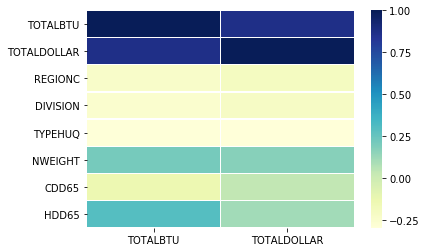

In [70]:
sns.heatmap(corr_matrix.iloc[:,:2], linewidths=.5, cmap = "YlGnBu")

In [71]:
corr_matrix = {}
for c in categories:
    df_corr = df_recs[['TOTALBTU','TOTALDOLLAR']]
    df_corr[cols_by_cat[c]] = df_recs[cols_by_cat[c]]

    if(c == "COMMON"):
        # drop recsyear and DOEID from df_corr as they are identifier rather than predictors
        df_corr.drop(['RECSYEAR','DOEID'], axis = 1, inplace = True)
    
    corr_matrix[c] = df_corr.corr(method = "spearman")
    

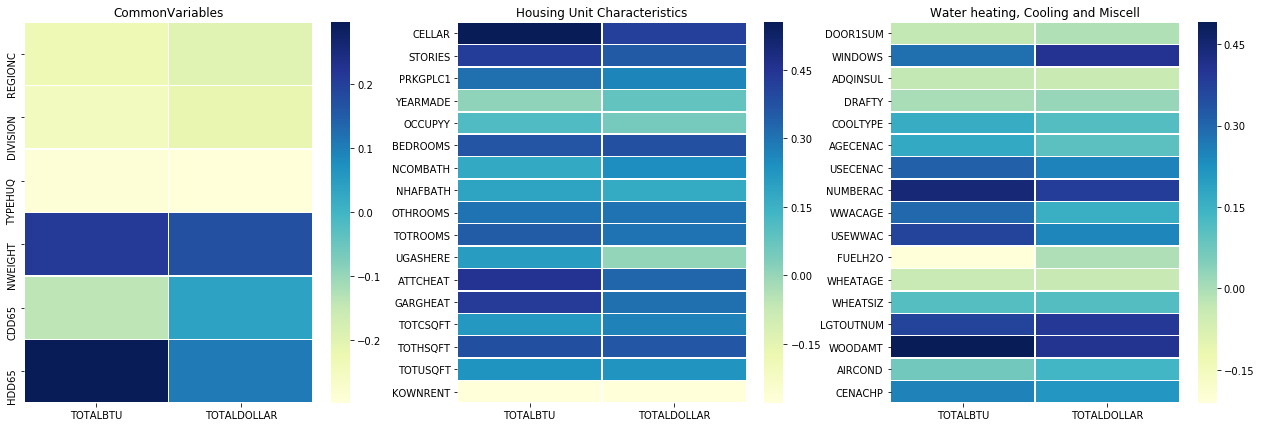

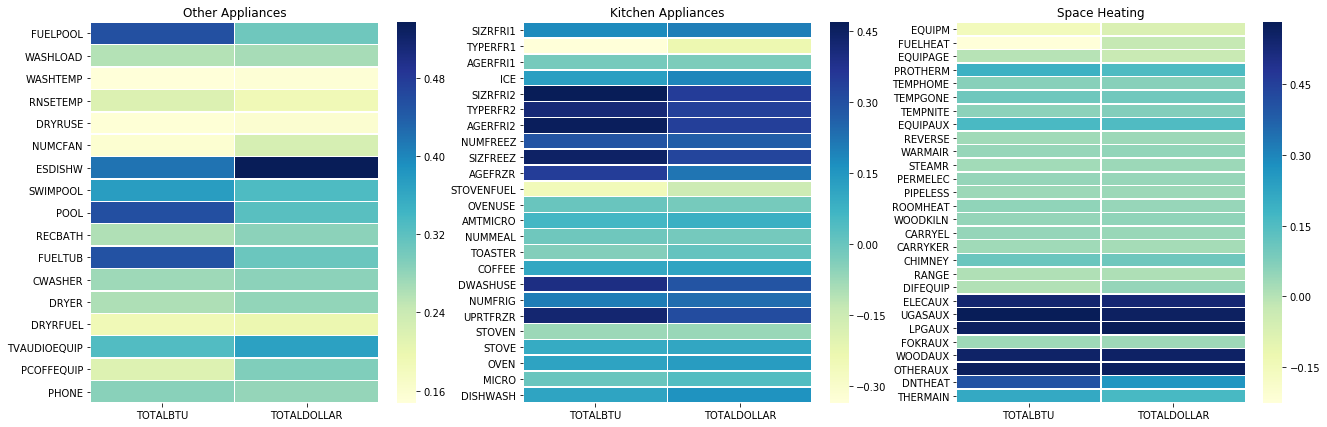

In [101]:
fig, axs = plt.subplots(1,3, figsize = (22, 7))

i = 0
for c in categories[:3]:
    sns.heatmap(corr_matrix[c].iloc[2:,:2], linewidths=.5, cmap = "YlGnBu", ax = axs[i])
    axs[i].set(title=df_cols[df_cols.COLUMN_CAT_ABBR == c].COLUMN_CATEGORY.unique()[0])
    i += 1

fig1, axs1 = plt.subplots(1,3, figsize = (22, 7))
i = 0
for c in categories[3:6]:
    sns.heatmap(corr_matrix[c].iloc[2:,:2], linewidths=.5, cmap = "YlGnBu", ax = axs1[i])
    axs1[i].set(title=df_cols[df_cols.COLUMN_CAT_ABBR == c].COLUMN_CATEGORY.unique()[0])
    i = i+ 1
    

In [115]:
df_recs['PERIODFO'].head()

0     
1     
2     
3     
4     
Name: PERIODFO, dtype: object